<a href="https://colab.research.google.com/github/dariashcherbakovaaa/MA_DSE_Unimi/blob/MultivariateStatistics/4_AMS_081123.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd

penguins = (
    pd.read_csv("https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv")
    .dropna()
    .drop(columns="year")
    .convert_dtypes()
)

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,male
1,Adelie,Torgersen,39.5,17.4,186,3800,female
2,Adelie,Torgersen,40.3,18.0,195,3250,female
4,Adelie,Torgersen,36.7,19.3,193,3450,female
5,Adelie,Torgersen,39.3,20.6,190,3650,male


In [16]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.0,333.0,333.0,333.0
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.1,13.1,172.0,2700.0
25%,39.5,15.6,190.0,3550.0
50%,44.5,17.3,197.0,4050.0
75%,48.6,18.7,213.0,4775.0
max,59.6,21.5,231.0,6300.0


In [17]:
from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.cluster import KMeans

categorical_selector = selector(dtype_include="string")
quantitative_selector = selector(dtype_exclude="string")

ohe = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
scaler = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ("ohe", ohe, categorical_selector),
        ("scaler", scaler, quantitative_selector),
    ]
)

kmeans = KMeans(n_clusters=3)

pipeline = Pipeline(
    steps = [
        ("preprocessing", preprocessor),
        ("kmeans", kmeans)
    ]
)

pipeline


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7a0fee75d4b0>),
                                                 ('scaler', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7a0fee75c250>)])),
                ('kmeans', KMeans(n_clusters=3))])

In [18]:
_ = pipeline.fit(penguins)
kmeans_pipeline

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=5, random_state=42))])

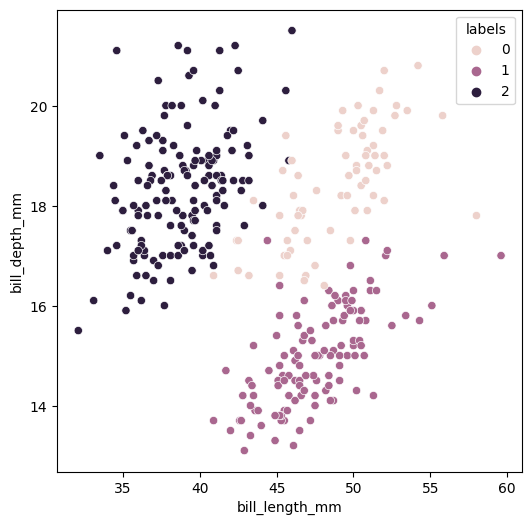

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(6, 6))

_ = (
    penguins
    .assign(labels=pipeline["kmeans"].labels_)
    .pipe(
        sns.scatterplot,
        x="bill_length_mm",
        y="bill_depth_mm",
        hue="labels"
    )
)

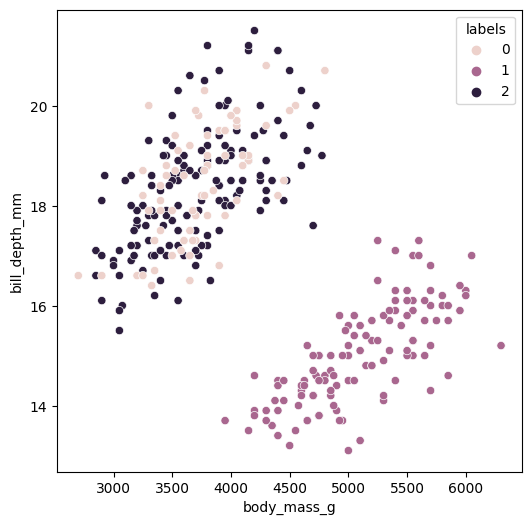

In [20]:
fig, ax = plt.subplots(figsize=(6, 6))

_ = (
    penguins
    .assign(labels=pipeline["kmeans"].labels_)
    .pipe(
        sns.scatterplot,
        x="body_mass_g",
        y="bill_depth_mm",
        hue="labels"
    )
)

In [21]:
pipeline["kmeans"].inertia_

652.2547107606903

 #### write a for loop to run the KMeans algorithm with a number of clusters (n_clusters) from 2 to 10/15.
 #### and pick the appropriate number of clusters based on inertia.

1. define a list to store the inerta
2. write the for loop
3. inside the loop, fit a kmeans/pipeline instance
4. append the inertia to the list
5. draw a plot of the list


In [22]:
import pandas as pd

penguins = (
    pd.read_csv("https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv")
    .dropna()
    .drop(columns="year")
    .convert_dtypes()
)

X = preprocessor.fit_transform(penguins)

In [23]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,male
1,Adelie,Torgersen,39.5,17.4,186,3800,female
2,Adelie,Torgersen,40.3,18.0,195,3250,female
4,Adelie,Torgersen,36.7,19.3,193,3450,female
5,Adelie,Torgersen,39.3,20.6,190,3650,male
...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207,4000,male
340,Chinstrap,Dream,43.5,18.1,202,3400,female
341,Chinstrap,Dream,49.6,18.2,193,3775,male
342,Chinstrap,Dream,50.8,19.0,210,4100,male


In [44]:
def num_clusters(cluster_range, data):
  inertia = []
  for clusters in cluster_range:
    model = KMeans(n_clusters = clusters, n_init = 'auto')
    _ = model.fit(data)
    inertia.append(model.inertia_)
  return inertia

In [45]:
cluster_range = range(2, 16, 1)

num_clusters(cluster_range, X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[935.8528325775396,
 652.2547107606903,
 515.9051329665238,
 382.69388722957274,
 315.90143234246784,
 288.8234004527269,
 263.29171312324945,
 240.7152183769658,
 216.25466433250963,
 200.32309633059998,
 192.51448134578703,
 185.4315826723279,
 179.79582596256034,
 173.2932708299264]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

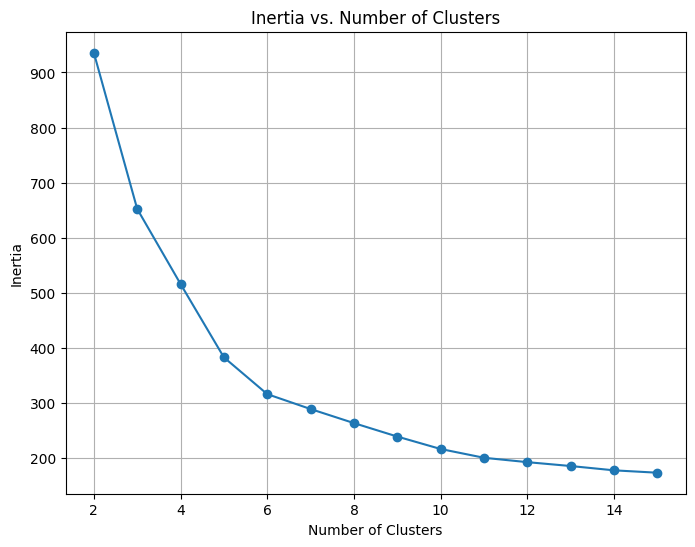

In [48]:
cluster_range = range(2, 16, 1)

inertia = []
for clusters in cluster_range:
  model = KMeans(n_clusters = clusters)
  _ = model.fit(X)
  inertia.append(model.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia, marker='o', linestyle='-')
plt.title('Inertia vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [46]:
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia, marker='o', linestyle='-')
plt.title('Inertia vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

NameError: ignored

<Figure size 800x600 with 0 Axes>